In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import rebound
from rebound.plotting import fading_line
import astropy.units as u
from astropy import constants as c
import pickle
%matplotlib notebook

In [2]:
from garnets import *

In [3]:
### Makes multiple systems with same star parameters, and stores into list as garnets objects (star, planet, etc.)
# n = number of systems to make. Note they all have same star to initaite. See garnets code for explanation.
def make_systems(n):
    systems = []
    for i in np.arange(n):
        systems.append(generate_stellar_system(Star(mass_ratio=1.0, age=1.0)))
    return systems

In [4]:
### DO NOT ACTIVATE THIS AGAIN UNLESS YOU KNOW YOU NEED TO. 
### This stores the systems made into a pickle file.

#sample_of_ten = make_systems(10)
#for i in np.arange(len(sample_of_ten)):
#    print(len(sample_of_ten[i].planets))
#pickle.dump(sample_of_ten, open("tensamp.p", "wb"))

In [5]:
# This loads in the sample of ten systems (ten samp), and cues mystar as the same star given in make_systems.
# Useful to have a consistent set of systems to play with. 

mystar = Star(mass_ratio=1.0, age = 1.0)
tensamp = pickle.load(open("tensamp.p", "rb"))

---------------------------------
REBOUND version:     	3.17.3
REBOUND built on:    	Jul  8 2021 17:44:30
Number of particles: 	5
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7f8aa38c4680, m=1.0 x=-0.002897791648092594 y=-0.0003713536527007212 z=0.0 vx=2.5812599588356544e-05 vy=-0.00016931336123057587 vz=0.0>
<rebound.particle.Particle object at 0x7f8aa38c4a70, m=4.3476417127787595e-08 x=0.27932864517725275 y=0.018213282179435707 z=0.0 vx=-0.118632136077878 vy=1.9541222428585663 vz=0.0>
<rebound.particle.Particle object at 0x7f8aa38c4680, m=4.048209875509815e-07 x=-0.13621333744720332 y=0.32535083603261805 z=0.0 vx=-1.5740517223120734 vy=-0.5645447938208831 vz=0.0>
<rebound.particle.Particle object at 0x7f8aa38c4a70, m=4.49729949083016e-06 x=0.3388633216521595 y=0.7725051487663569 z=0.0 vx=-0.9715634448365741 vy=0.5569587575355397 vz=0.0>
<rebound.particle

<IPython.core.display.Javascript object>


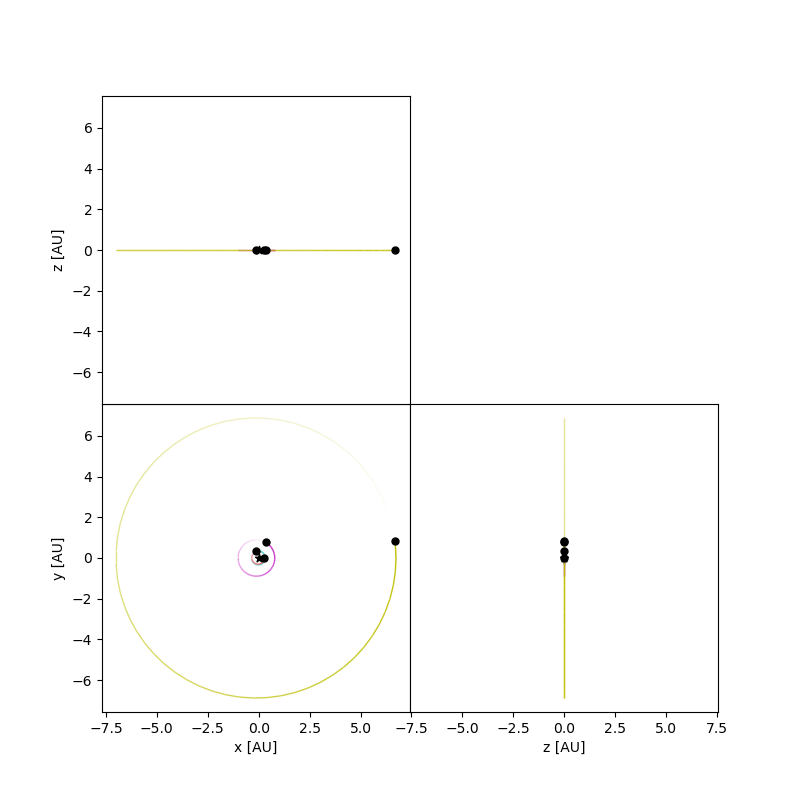

In [6]:
#Picks one of the systems.
mysystem = tensamp[4]

# Creates array of the system's planets SMAx, in order from inward out.
smas = np.zeros(len(mysystem.planets))
for i in np.arange(len(mysystem.planets)):
    smas[i] = mysystem.planets[i].orbit.a
sortedsmas = np.argsort(smas)

# Creates ReBound simulation, adds star.
sim = rebound.Simulation()

sim.add(m=mystar.mass_ratio)

# Adds point masses with planet's properties to the simulation.
for i in sortedsmas:
    sim.add(m = mysystem.planets[i].mass,     #unit = solar masses from garnets, solar masses into rebound 
            r = mysystem.planets[i].radius*(u.km).to(u.AU),   # converts km to AU for planet radii
            
            a = mysystem.planets[i].orbit.a, 
            e = mysystem.planets[i].orbit.e,
            inc = 0,
            #pomega = np.random.uniform(-np.pi, np.pi) #unnecessary orbital position term
            f = np.random.uniform(-np.pi, np.pi)
           )
           #inc = np.random.rand(1)) # this can be added to randomize the inclination

sim.move_to_com()
sim.integrator = "ias15"
#sim.integrate(2*np.pi, exact_finish_time=0) #this line will move the simulation forward in time. W/o this, starting pos only.

sim.collision = 'direct'
sim.collision_resolve = 'hardsphere'

sim.status() #prints the starting info of simulation

fig = rebound.OrbitPlot(sim, slices = 1.0, unitlabel="[AU]", color=True)

---------------------------------
REBOUND version:     	3.17.3
REBOUND built on:    	Jul  8 2021 17:44:30
Number of particles: 	6
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7ffe823700e0, m=1.0 x=-0.005698418834578212 y=-0.0011808380433286777 z=0.0 vx=6.963515889346213e-05 vy=2.1665586844638846e-05 vz=-2.060225350619018e-20>
<rebound.particle.Particle object at 0x7ffe82370680, m=4.3476417127787595e-08 x=-0.23379484697013475 y=0.24335726224912455 z=0.0 vx=-1.1922779690132006 vy=-1.1494200039960538 vz=-2.060225350619018e-20>
<rebound.particle.Particle object at 0x7ffe823700e0, m=4.048209875509815e-07 x=0.0978793235471771 y=0.34016359512587263 z=0.0 vx=-1.5597004286844147 vy=0.5361717699432916 vz=-2.060225350619018e-20>
<rebound.particle.Particle object at 0x7ffe82370680, m=4.49729949083016e-06 x=-0.41277884025084316 y=0.8013481020886054 z=0.0 vx=-0.87563449

<IPython.core.display.Javascript object>


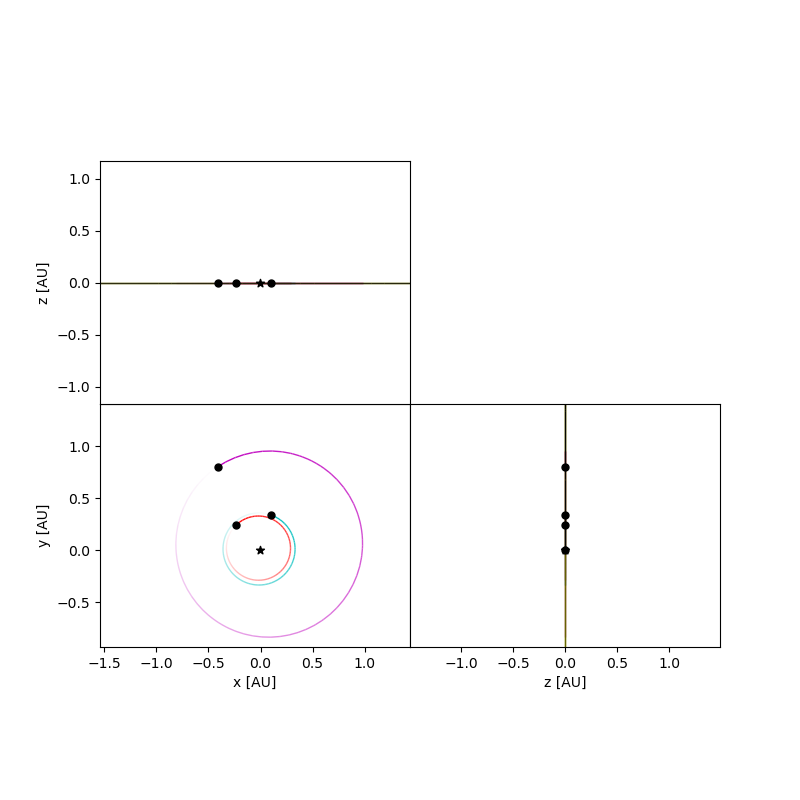

In [14]:
### May 4 21 - inflates the planets to make a collision happen. Also, adds a copy of last planet in opposite
# direction to ensure collision. 

mysystem = tensamp[4]

# Creates array of the planet's SMAx, puts in short-long order.
smas = np.zeros(len(mysystem.planets))
for i in np.arange(len(mysystem.planets)):
    smas[i] = mysystem.planets[i].orbit.a
sortedsmas = np.argsort(smas)

# Creates rebound simulation, adds star.
sim = rebound.Simulation()

sim.add(m=mystar.mass_ratio)

# Adds point masses with planet's properties to the simulation.
for i in sortedsmas:
    sim.add(m = mysystem.planets[i].mass, 
            r = mysystem.planets[i].radius/1000000,#*(u.km).to(u.AU),   # converts km to AU for planet radii
            
            a = mysystem.planets[i].orbit.a, 
            e = mysystem.planets[i].orbit.e,
            inc = 0,
            pomega = np.random.uniform(-np.pi, np.pi),
            f = np.random.uniform(-np.pi, np.pi)
           )

# This attempts to force a collision, but introducing a planet on same orbit going opposite direction.
sim.add(m = mysystem.planets[0].mass,
        a = mysystem.planets[0].orbit.a,
        e = mysystem.planets[0].orbit.e,
        r = mysystem.planets[0].radius/1000000,#*(u.km).to(u.AU),
        inc = np.pi
       )
sim.move_to_com()
sim.integrator = "ias15"
#sim.integrate(2*np.pi, exact_finish_time=0)

sim.collision = 'direct'
sim.collision_resolve = 'merge'

sim.status()

        #vx[i] = sim.particles[p].vx
    #print( vx[i] )

#fig, (ax, ax2) = plt.subplots(2)
#ax = plt.subplot(112)
#for p in np.arange(len(mysystem.planets)+1):
    #ax.plot(x[p,:], y[p,:])#, marker='.', s=1.2

#ax2 = plt.subplot(212)
#for p in np.arange(len(mysystem.planets)+1):
    #ax2.scatter(x[p,:], y[p,:], marker='.', s=1.2)

fig = rebound.OrbitPlot(sim, slices = 1.0, unitlabel="[AU]", color=True)
#fig.title("Sim with {0}({1}) Planets".format( len(mysystem.planets), len(sim.particles)-1 ))

<IPython.core.display.Javascript object>


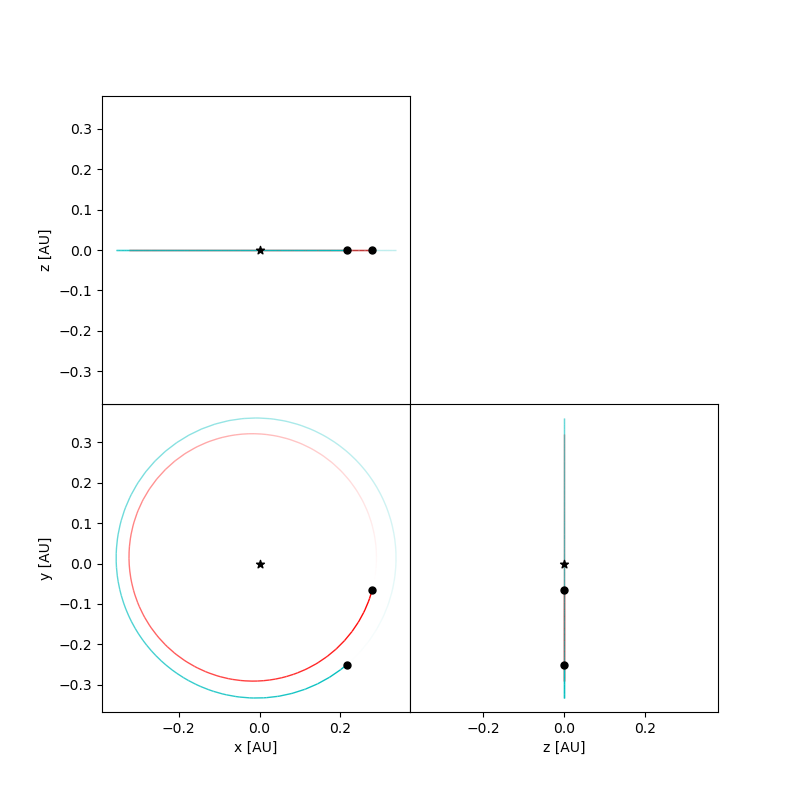

In [15]:
#This sets ReBound to run the simulation forward for Norbs orbits, and record positions in x and y.

Norbs = 5000
torb = np.pi
Noutputs = 2500
sim.dt= 1e-6

times = np.linspace(torb, Norbs*torb, Noutputs)

x = np.zeros((len(mysystem.planets)+1, Noutputs))
y = np.zeros((len(mysystem.planets)+1, Noutputs))

for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    for p in np.arange( len(sim.particles)-1 ):
        x[p,i] = sim.particles[int(p)].x
        y[p,i] = sim.particles[int(p)].y
        
#fig = rebound.OrbitPlot(sim, slices = 1.0, unitlabel="[AU]", color=True)

#Plots the recorded x y positions above. 
# Figure title shows number of planets (and number tracked in ReBound simulation)

fig, ax = plt.subplots()

for p in np.arange(len(mysystem.planets)+1):
    ax.scatter(x[p,:], y[p,:], marker='.', s=5)
    
#anim = animation.Animation(fig, ax)
ax.set_ylabel(ylabel='AU')
ax.set_xlabel(xlabel='AU')
ax.set_title("Sim with {0}({1}) Planets".format( len(mysystem.planets), len(sim.particles)-1 ))

<IPython.core.display.Javascript object>


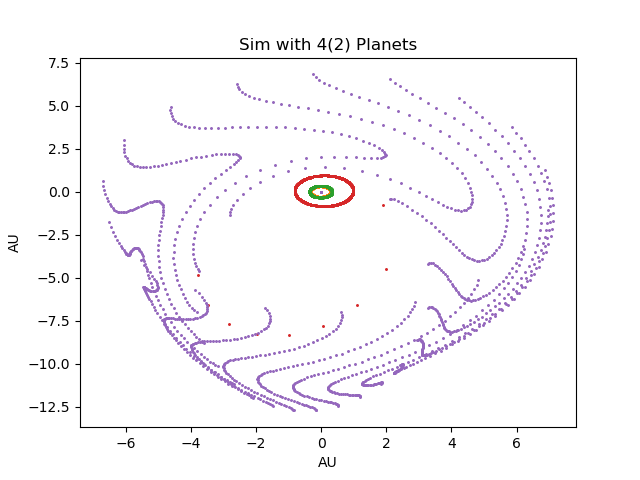

Text(0.5, 1.0, 'Sim with 4(2) Planets')

In [16]:
#Plots the recorded x y positions above. 
# Figure title shows number of planets (and number tracked in ReBound simulation)

fig, ax = plt.subplots()

for p in np.arange(len(mysystem.planets)+1):
    ax.scatter(x[p,:], y[p,:], marker='.', s=5)
    
#anim = animation.Animation(fig, ax)
ax.set_ylabel(ylabel='AU')
ax.set_xlabel(xlabel='AU')
ax.set_title("Sim with {0}({1}) Planets".format( len(mysystem.planets), len(sim.particles)-1 ))

In [53]:
#Text description of systems, all outputs of garnets.py
for i, sys in enumerate (tensamp):
    print(i, sys)

0 Unnamed Star: mass = 1.0 solar mass; age = 1.0
----------------  --------------------------------------------
Type              PlanetType.SUB_GAS_GIANT
Mass              1.0711267405667741 M_earth
Radius            14959.415570213636 km
Orbit             a = 49.39453559628907 e = 0.1727116745995264
Surface gravity   inf g
Surface pressure  inf atm
Atmosphere        No Atmosphere
Moons             No Moons
----------------  --------------------------------------------
----------------  ---------------------------------------------
Type              PlanetType.GAS_GIANT
Mass              0.8725488083751675 M_jupiter
Radius            65017.21890259058 km
Orbit             a = 8.040746684549148 e = 0.08876070273911985
Surface gravity   inf g
Surface pressure  inf atm
Atmosphere        No Atmosphere
Moons             No Moons
----------------  ---------------------------------------------
----------------  ---------------------------------------------
Type              PlanetType.GAS_GI

<IPython.core.display.Javascript object>


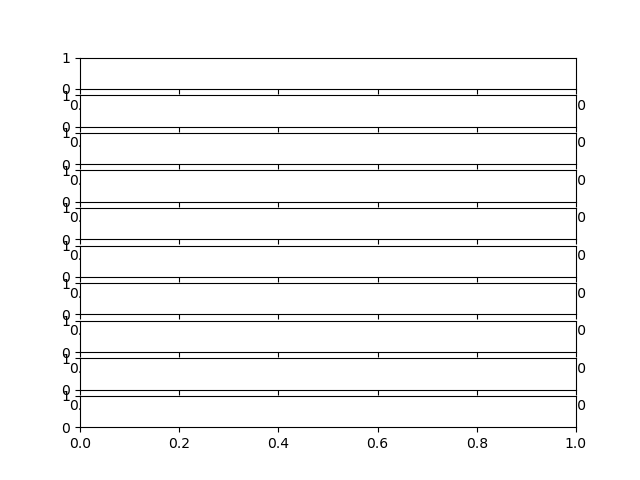

Sim index 0 with 7 Planets


<IPython.core.display.Javascript object>


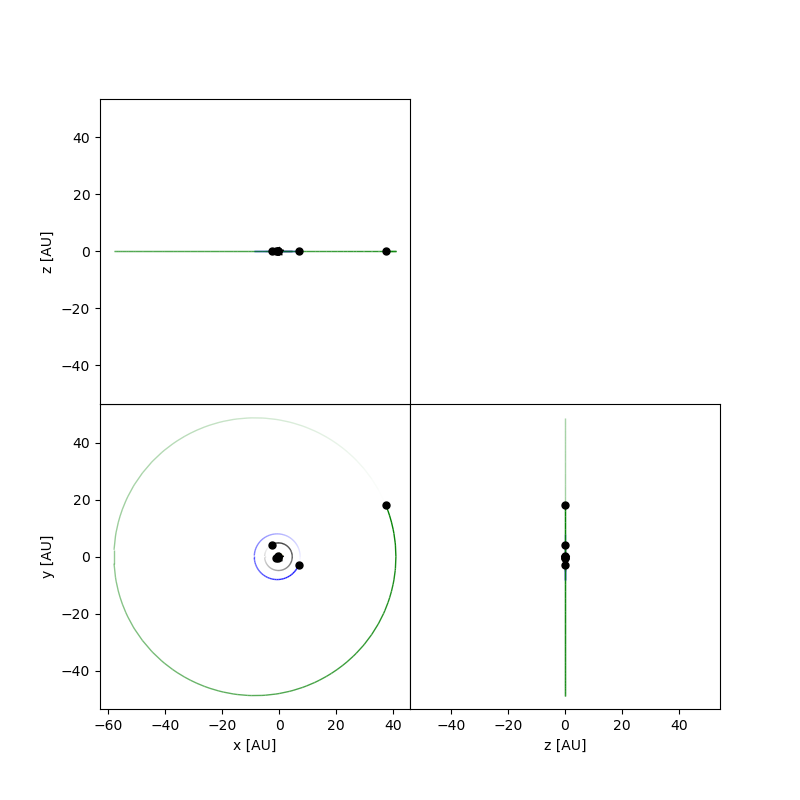

Sim index 1 with 8 Planets


<IPython.core.display.Javascript object>


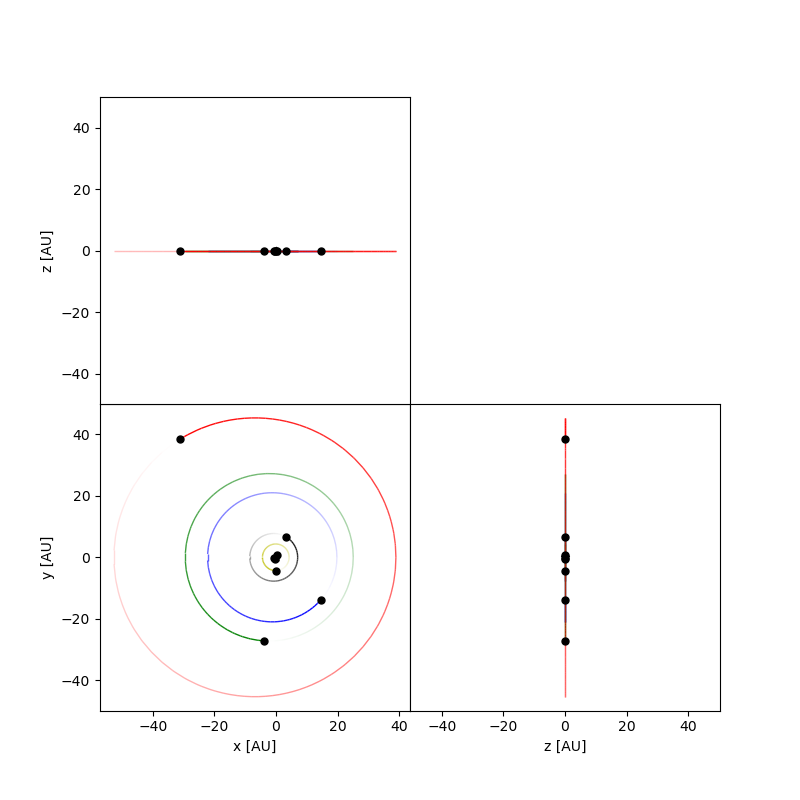

Sim index 2 with 5 Planets


<IPython.core.display.Javascript object>


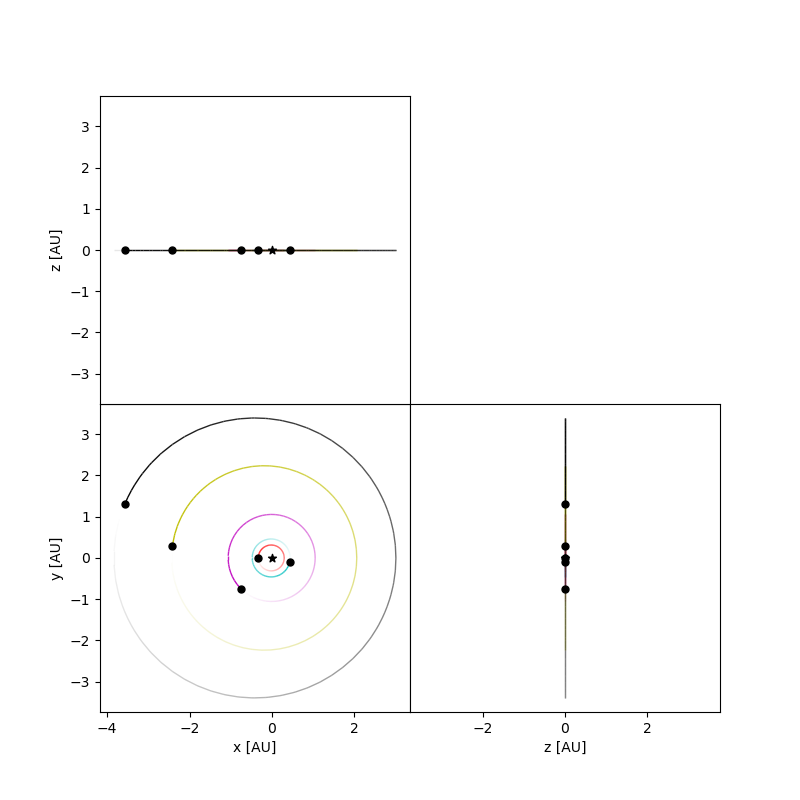

Sim index 3 with 3 Planets


<IPython.core.display.Javascript object>


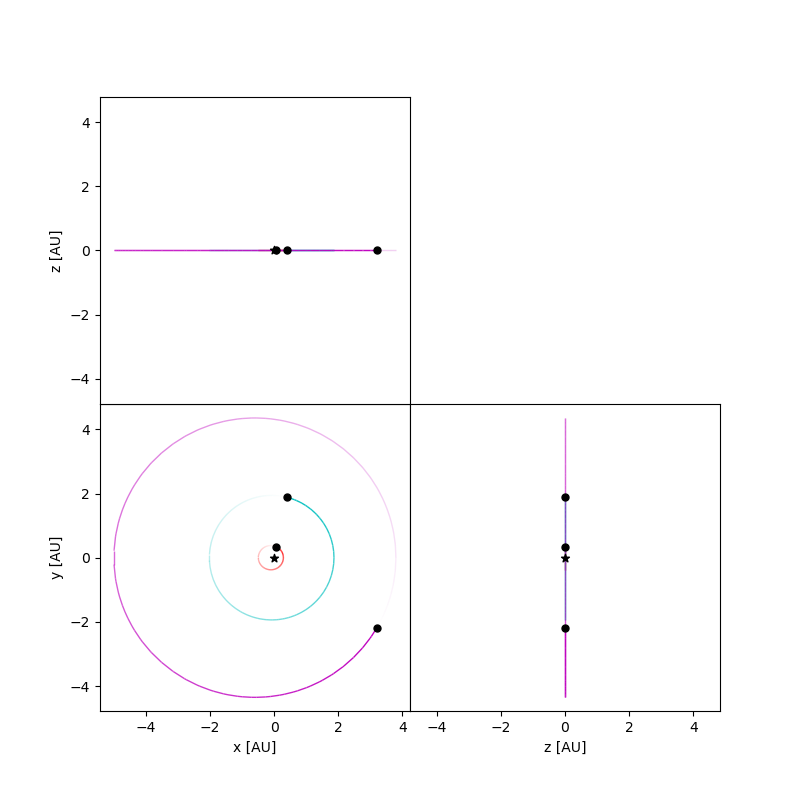

Sim index 4 with 4 Planets


<IPython.core.display.Javascript object>


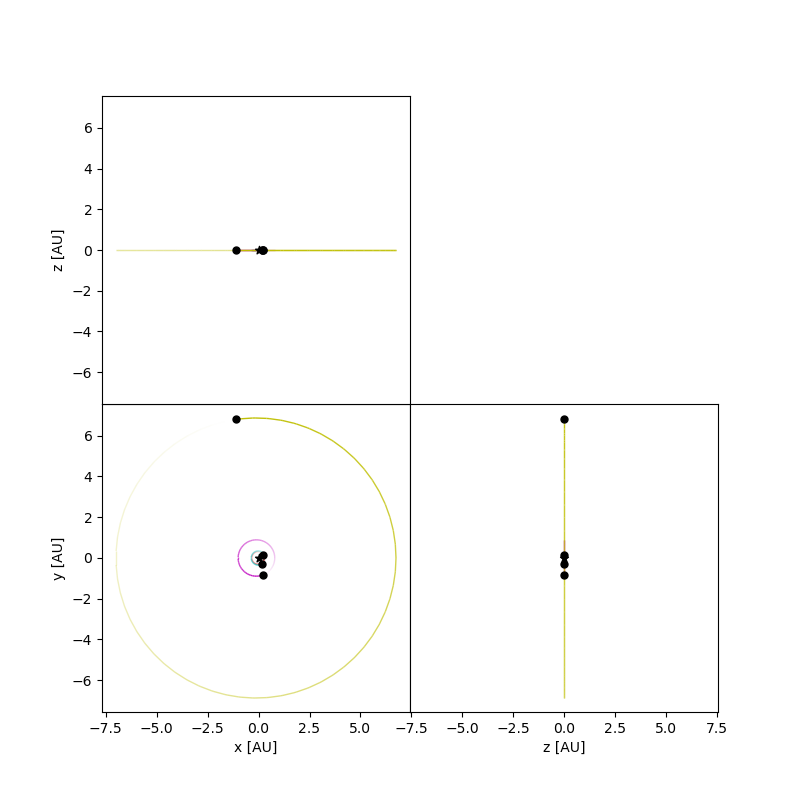

Sim index 5 with 4 Planets


<IPython.core.display.Javascript object>


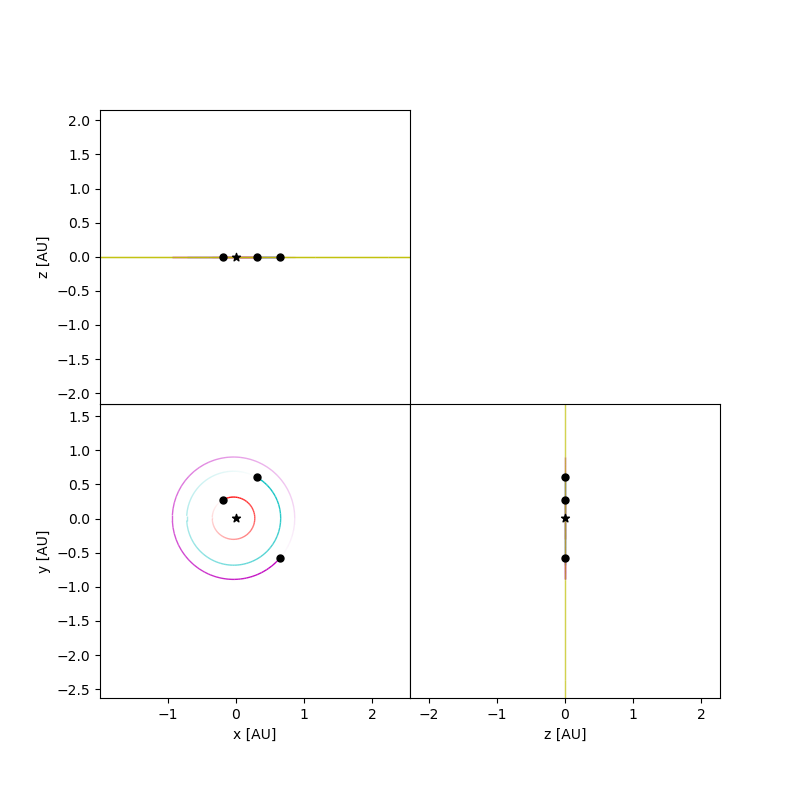

Sim index 6 with 8 Planets


<IPython.core.display.Javascript object>


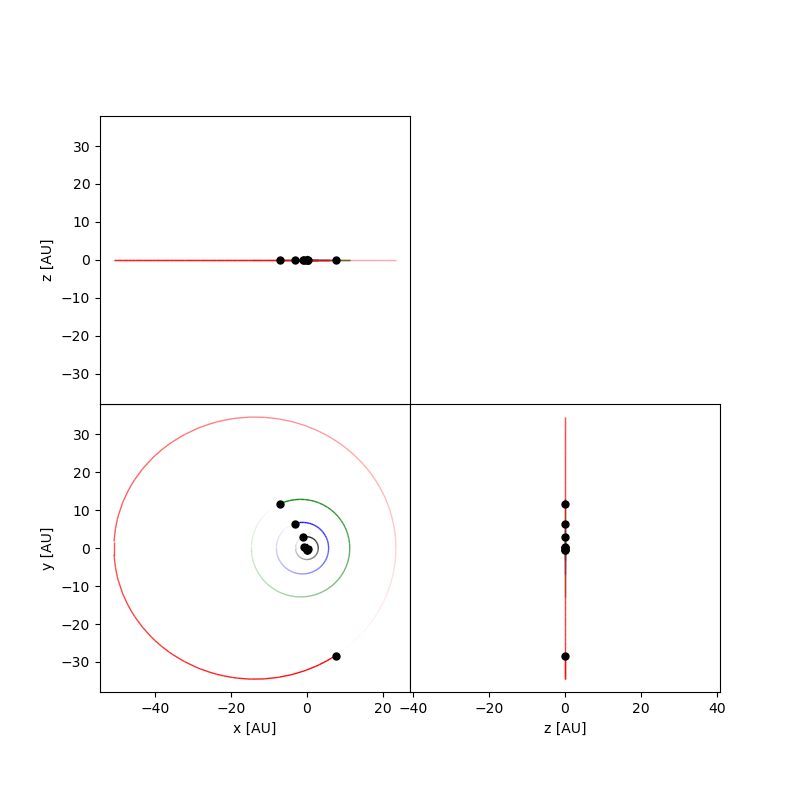

Sim index 7 with 6 Planets


<IPython.core.display.Javascript object>


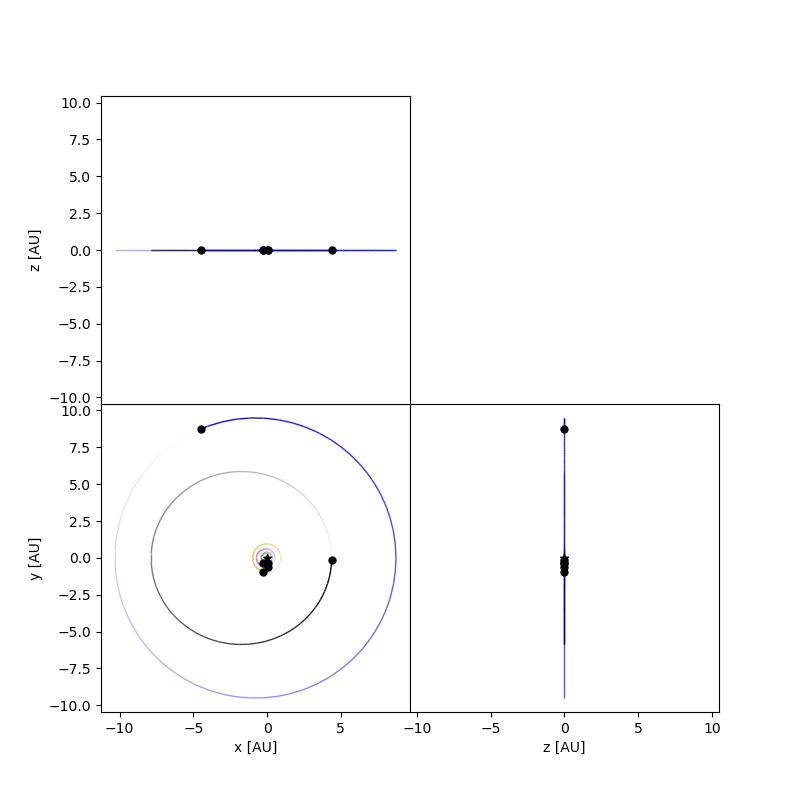

Sim index 8 with 7 Planets


<IPython.core.display.Javascript object>


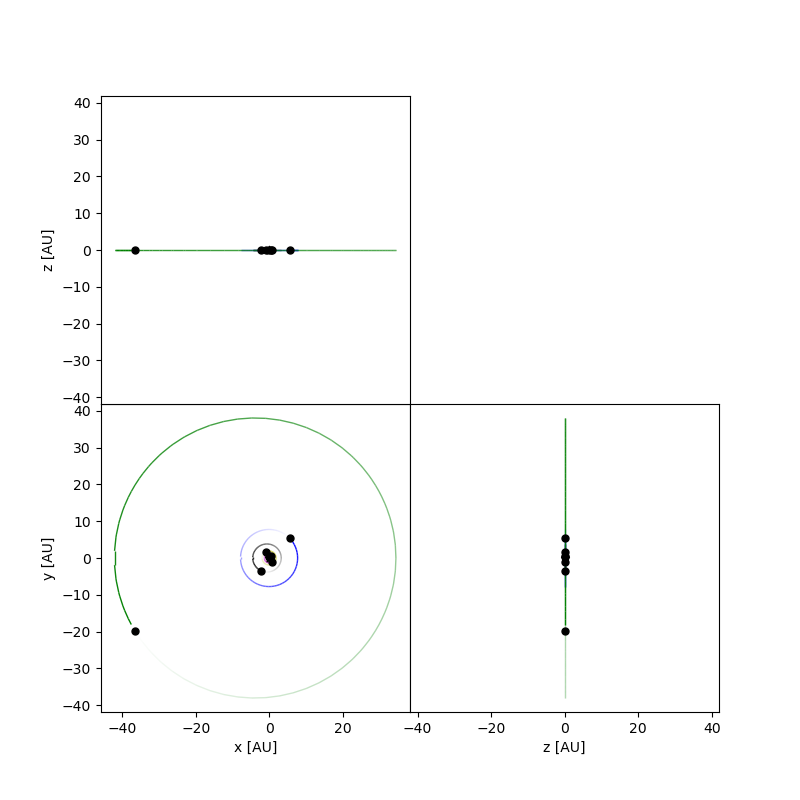

Sim index 9 with 8 Planets


<IPython.core.display.Javascript object>


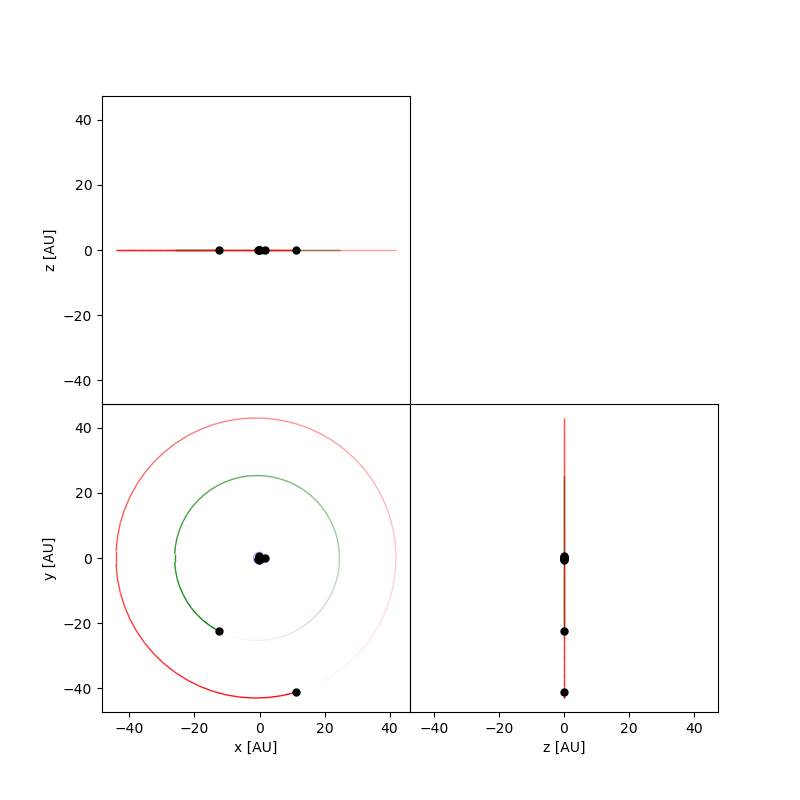

In [7]:
#The below plots all ten systems from tensamp into the corner plots of ReBound for visualization. 
#Not sure what the first empty rectangles are from. 

axs = np.arange(len(tensamp))
fig, axs = plt.subplots(len(tensamp))

for p, sys in enumerate (tensamp):
    # Creates array of the planet's SMAx, puts in short-long order.
    smas = np.zeros(len(sys.planets))
    for i in np.arange(len(sys.planets)):
        smas[i] = sys.planets[i].orbit.a
    sortedsmas = np.argsort(smas)

    # Creates rebound simulation, adds star.
    sim = rebound.Simulation()

    sim.add(m=mystar.mass_ratio)

    # Adds point masses with planet's properties to the simulation.
    for i in sortedsmas:
        sim.add(m = sys.planets[i].mass, 
                r = sys.planets[i].radius*(u.km).to(u.AU),   # converts km to AU for planet radii

                a = sys.planets[i].orbit.a, 
                e = sys.planets[i].orbit.e,
                inc = 0,
                #pomega = np.random.uniform(-np.pi, np.pi)
                f = np.random.uniform(-np.pi, np.pi)
               )
               #inc = np.random.rand(1))
    #sim.add(m = mysystem.planets[-1].mass,
    #        a = mysystem.planets[-1].orbit.a,
    #        e = mysystem.planets[-1].orbit.e,
    #        r = mysystem.planets[-1].radius*(u.km).to(u.AU),
    #        inc = 180,
    #       )
    sim.move_to_com()
    print("Sim index {0} with {1} Planets".format(p, len(sys.planets)))
    axs[p] = rebound.OrbitPlot(sim, unitlabel="[AU]", slices=1, color=True)

# Below this point are abandoned versions of exploring the tensamp data. 
# Where SM tinkered to make the code blocks above.

<IPython.core.display.Javascript object>


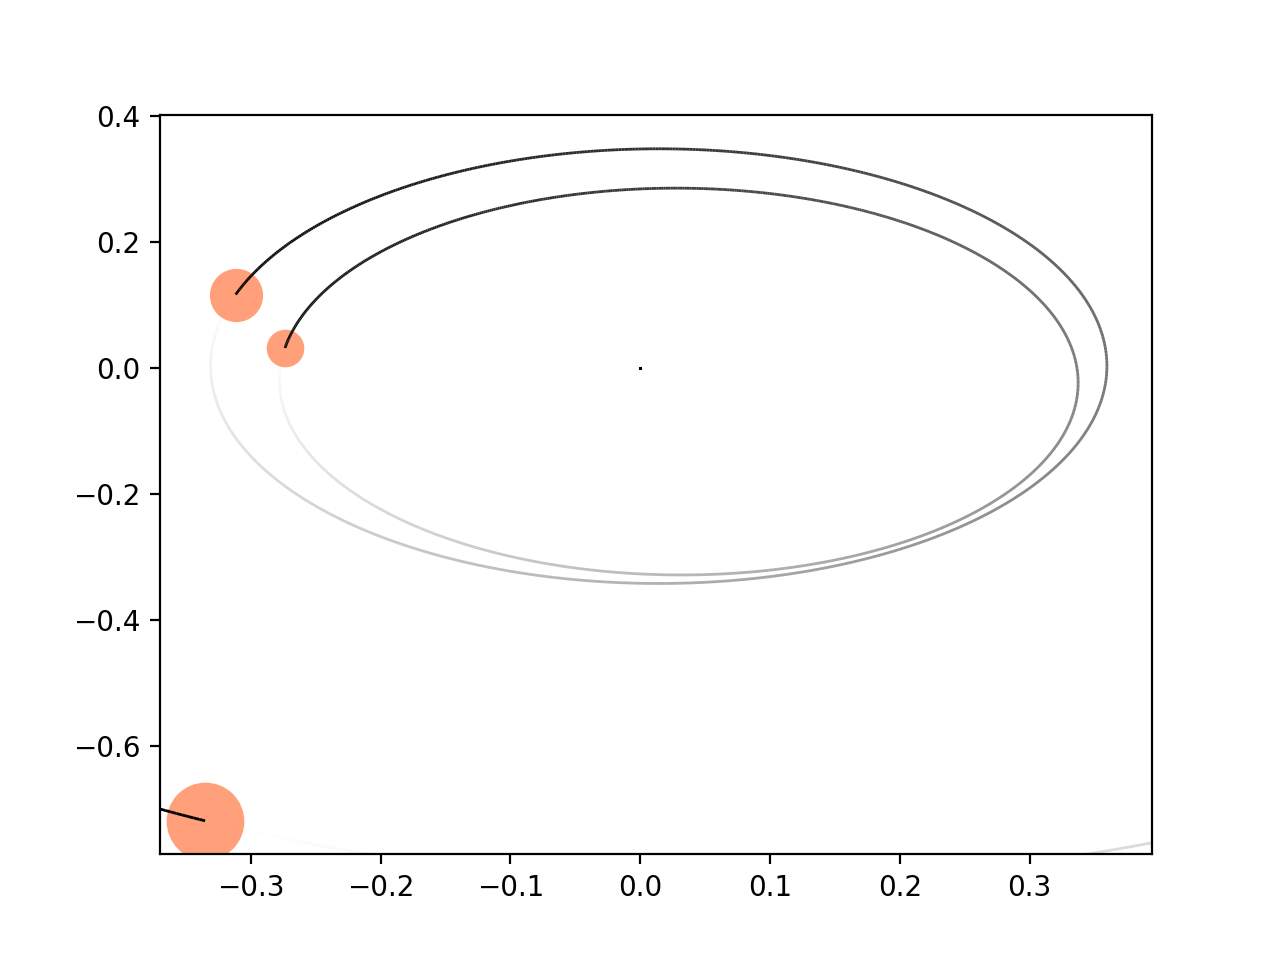

36.8572281716439 1 / AU earthRad SMA = 0.3084330769371019
77.35520946613585 1 / AU earthRad SMA = 0.3452886030290996
170.51591569052974 1 / AU earthRad SMA = 0.8951419124983534


In [54]:
### This code will make a plot of the system, without any integrations forward in time. Nice looking. 

fig, ax = plt.subplots()
ps = sim.particles

# manually set plot boundaries
#lim = ps[-1].a #limit is sma of furthest planet
#ax.set_xlim([-lim, lim]) 
#ax.set_ylim([-lim, lim])

# plot the stars and planets with separate symbols
linewidth=0.001
for star in ps[:1]:
    ax.scatter(star.x, star.y, s=35*linewidth, marker='*', facecolor='black', zorder=3)

for planet in ps[1:]:
    #planetradAU = planet.r
    print( planet.r/c.R_earth.to(u.AU), u.R_earth, "SMA =", planet.a )
    radE = (planet.r/c.R_earth.to(u.AU)).value
    if radE > 2.0:
        colbyrad='lightsalmon'
    elif (radE > 0.8) & (radE <= 2.0):
        colbyrad='deepskyblue'
    else:
        colbyrad='grey'
    
    ax.scatter(planet.x, planet.y, s=planet.r*1e5, c=colbyrad)
    o = np.array(planet.sample_orbit(Npts=1000,timespan=planet.P*1,primary=ps[0]))
    lc = fading_line(o[:,0], o[:,1], linewidth=linewidth)
    ax.add_collection(lc)

In [12]:
### The code below is the example of ReBound collision/merging
### from https://rebound.readthedocs.io/en/latest/ipython/CloseEncounters.html

def setupSimulation():
    sim = rebound.Simulation()
    sim.integrator = "ias15" # IAS15 is the default integrator, so we don't need this line
    sim.add(m=1.)
    sim.add(m=1e-3, a=1., r=np.sqrt(1e-3/3.)) # we now set collision radii!
    sim.add(m=5e-3, a=1.25, r=1.25*np.sqrt(5e-3/3.))
    sim.move_to_com()
    return sim

Particles in the simulation at t=   0.0: 3


<IPython.core.display.Javascript object>


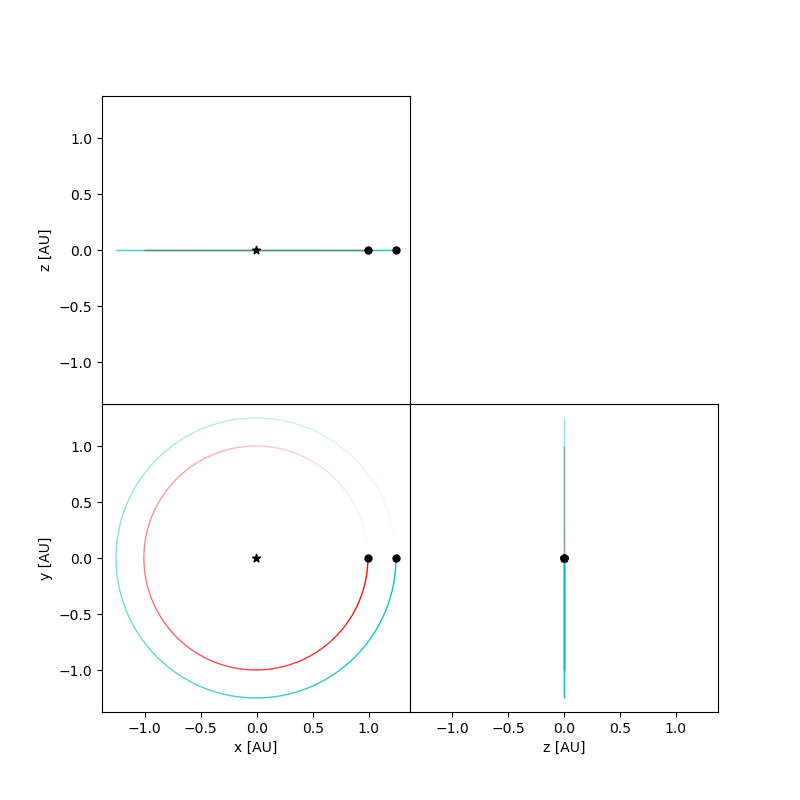

Particles in the simulation at t= 100.0: 3


<IPython.core.display.Javascript object>


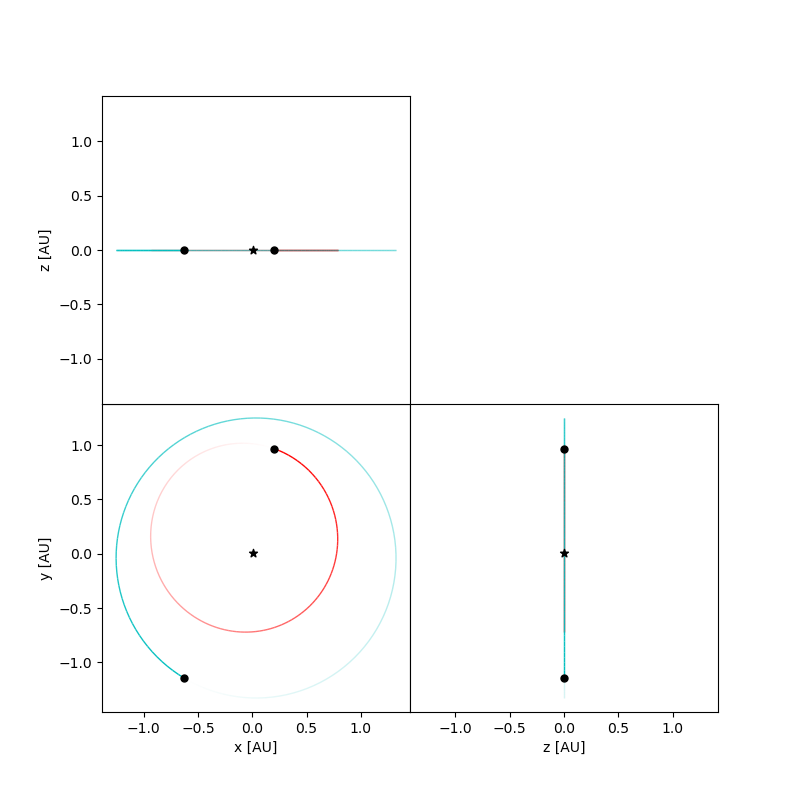

Particles in the simulation at t= 200.0: 3


<IPython.core.display.Javascript object>


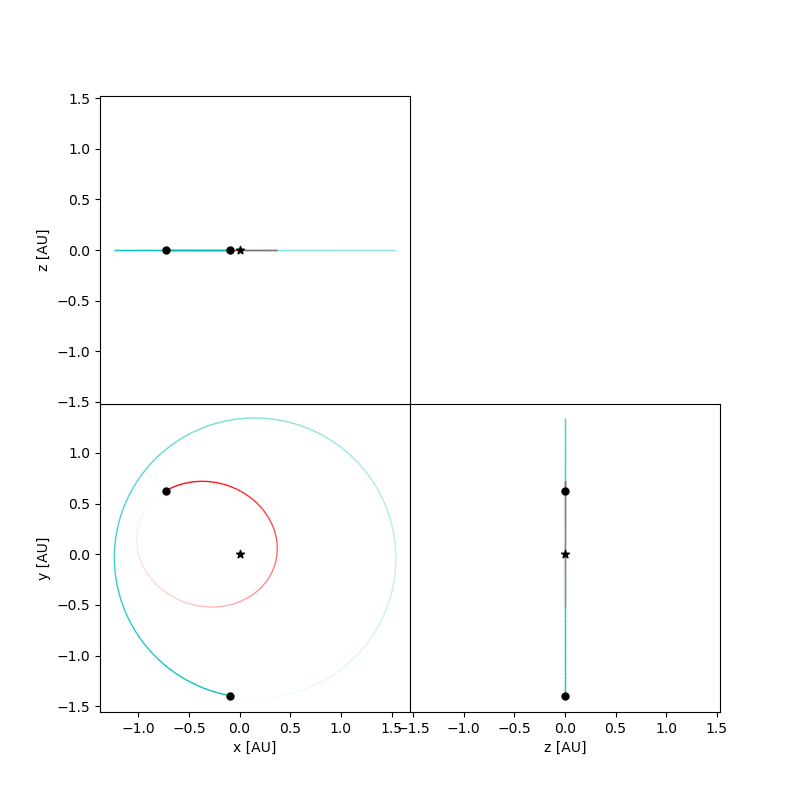

Particles in the simulation at t= 300.0: 3


<IPython.core.display.Javascript object>


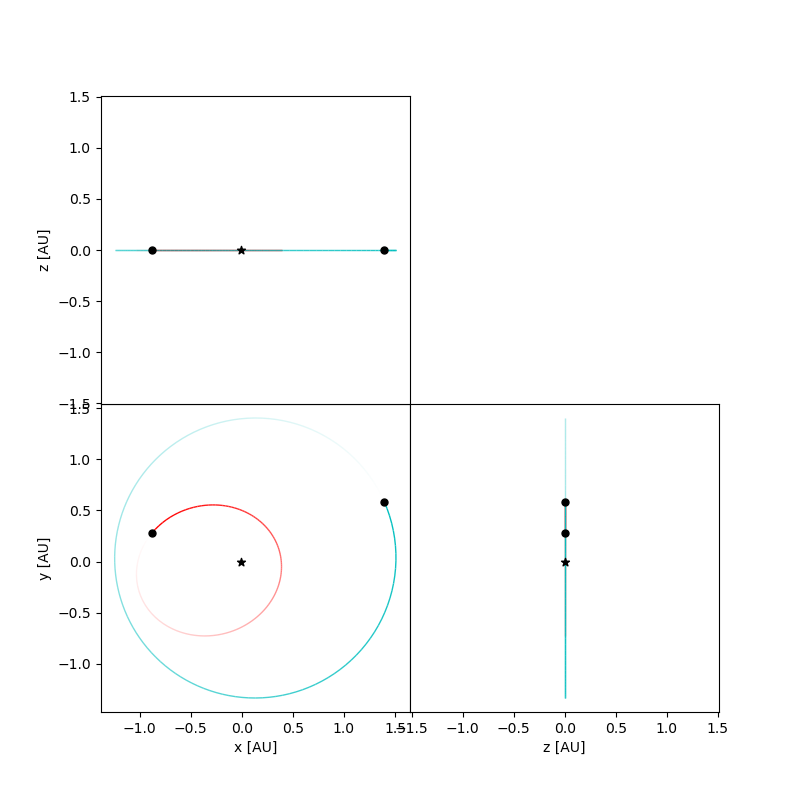

In [27]:
sim = setupSimulation()
sim.collision = "direct"
sim.collision_resolve = "hardsphere"

print("Particles in the simulation at t=%6.1f: %d"%(sim.t,sim.N))
# Plots the simulation of "sim" in fancy rebound ways.
fig = rebound.OrbitPlot(sim, slices = 1.0, unitlabel="[AU]", color=True)

sim.integrate(100.)
print("Particles in the simulation at t=%6.1f: %d"%(sim.t,sim.N))
# Plots the simulation of "sim" in fancy rebound ways.
fig = rebound.OrbitPlot(sim, slices = 1.0, unitlabel="[AU]", color=True)
sim.integrate(200.)
print("Particles in the simulation at t=%6.1f: %d"%(sim.t,sim.N))
# Plots the simulation of "sim" in fancy rebound ways.
fig = rebound.OrbitPlot(sim, slices = 1.0, unitlabel="[AU]", color=True)
sim.integrate(300.)
print("Particles in the simulation at t=%6.1f: %d"%(sim.t,sim.N))
# Plots the simulation of "sim" in fancy rebound ways.
fig = rebound.OrbitPlot(sim, slices = 1.0, unitlabel="[AU]", color=True)

In [16]:
sim.status()

---------------------------------
REBOUND version:     	3.16.0
REBOUND built on:    	Apr  9 2021 14:33:26
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	1.0000000000000000e+02
Current timestep:    	0.221124
---------------------------------
<rebound.particle.Particle object at 0x7fa066ae5158, m=1.0 x=-0.0034885327690460117 y=0.0062596772424090424 z=0.0 vx=-0.004775016760667967 vy=-0.0026466999648626075 vz=0.0>
<rebound.particle.Particle object at 0x7fa066ae5268, m=0.006 x=0.5814221281743299 y=-1.043279540401526 z=0.0 vx=0.7958361267779945 vy=0.44111666081043444 vz=0.0>
---------------------------------


<IPython.core.display.Javascript object>


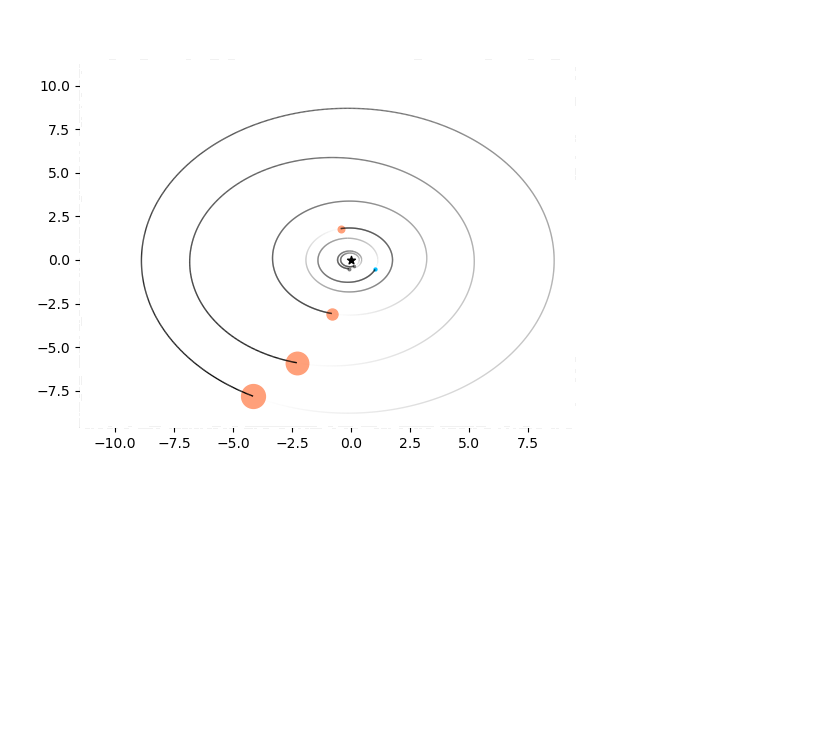

0.3774638753764812 earthRad SMA = 0.3960701716810737
0.7653282010709697 earthRad SMA = 0.5112292043726392
1.1010031283038242 earthRad SMA = 1.2695280990486482
3.8966855257815602 earthRad SMA = 1.8350760886147919
5.688303056896614 earthRad SMA = 3.2693899559113087
7.947352183088542 earthRad SMA = 6.0265744905101
8.120678927273406 earthRad SMA = 8.723091405639327
7.607540529033614 earthRad SMA = 17.304132275871872
2.8458811484115794 earthRad SMA = 35.99764249554648


In [43]:
### This code will make a plot of the system, without any integrations forward in time. Nice looking. 

fig, ax = plt.subplots()
ps = sim.particles

# manually set plot boundaries
#lim = ps[-1].a #limit is sma of furthest planet
#ax.set_xlim([-lim, lim]) 
#ax.set_ylim([-lim, lim])

# plot the stars and planets with separate symbols
linewidth=1.
for star in ps[:1]:
    ax.scatter(star.x, star.y, s=35*linewidth, marker='*', facecolor='black', zorder=3)

for planet in ps[1:]:
    print( planet.r/u.R_earth.to(u.km), u.R_earth, "SMA =", planet.a )
    radE = planet.r/u.R_earth.to(u.km)
    if radE > 2.0:
        colbyrad='lightsalmon'
    elif (radE > 0.8) & (radE <= 2.0):
        colbyrad='deepskyblue'
    else:
        colbyrad='grey'
    
    ax.scatter(planet.x, planet.y, s=2**radE+2*radE, c=colbyrad)
    o = np.array(planet.sample_orbit(Npts=1000,timespan=planet.P*1,primary=ps[0]))
    lc = fading_line(o[:,0], o[:,1], linewidth=linewidth)
    ax.add_collection(lc)

In [7]:
mysystem.planets

[----------------  --------------------------------------------
 Type              PlanetType.ROCK
 Mass              17.77829200608807 M_moon
 Radius            5171.6742623442815 km
 Orbit             a = 44.9489445125906 e = 0.05508507704900334
 Surface gravity   0.33228454521700845 g
 Surface pressure  8.526774193282802e-05 atm
 Atmosphere        No Atmosphere
 Moons             No Moons
 ----------------  --------------------------------------------,
 ----------------  -----------------------------------------------
 Type              PlanetType.GAS_GIANT
 Mass              0.20316644236433662 M_jupiter
 Radius            46354.6420570809 km
 Orbit             a = 22.769664802704394 e = 0.15247821067345058
 Surface gravity   inf g
 Surface pressure  inf atm
 Atmosphere        No Atmosphere
 Moons             ----------------  -----------------------------
                   Type              PlanetType.ROCK
                   Mass              0.523624166438056 M_moon
            

---------------------------------
REBOUND version:     	3.12.2
REBOUND built on:    	Sep  2 2020 15:16:34
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	6.2839999999992369e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.011828359026817049 y=-0.0026675454664669054 z=-0.0021039941322093816 vx=0.0005241108068587649 vy=0.0012565601233415107 vz=-1.0901647475694277e-06>
<rebound.Particle object, m=0.001 x=-0.24943132793887818 y=-0.44969737426532724 z=-0.02526802533616772 vx=1.321154448113062 vy=-1.0032917267717736 vz=-0.3335733992185344>
<rebound.Particle object, m=0.001 x=-1.513789715902982 y=1.4780994946109067 z=-0.0024350145540140487 vx=-0.49157667290914986 vy=-0.44164239524235244 vz=-0.00023498287370474823>
---------------------------------


<IPython.core.display.Javascript object>


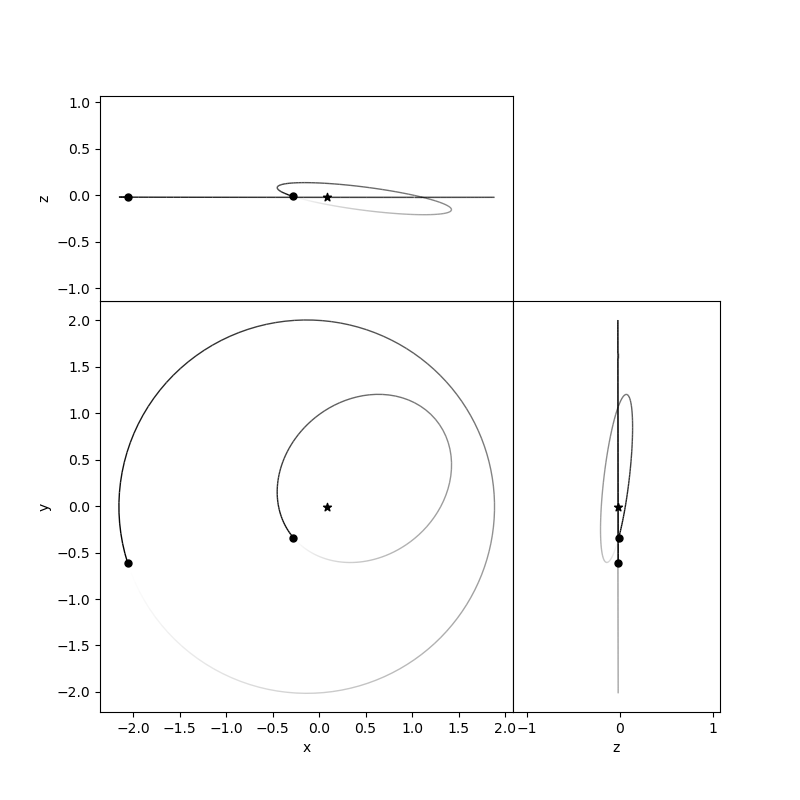

/Users/Sean/anaconda3/envs/astroconda/lib/python3.6/site-packages/rebound/plotting.py:81: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  ax_top   = divider.append_axes("top",  size="%.2f%%"%(100.*slices), sharex=ax_main)
/Users/Sean/anaconda3/envs/astroconda/lib/python3.6/site-packages/rebound/plotting.py:83: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.wspace'].  Set pad=0 to keep the old behavior.
  ax_right = divider.append_axes("right", size="%.2f%%"%(100.*slices), sharey=ax_main)


In [8]:
### This is using all rebound stuff. 

sim.move_to_com()
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=1e-3, a=1, e=0.5, inc=0.2, f=0.43, Omega=0.82, omega=2.98)
sim.add(m=1e-3, a=2, e=0.1)
sim.integrator = "whfast"
sim.dt = 1e-3
sim.integrate(2*np.pi, exact_finish_time=0)
particles = sim.particles
sim.status()

torb = 10*np.pi
Noutputs = 100
times = np.linspace(torb, 2*torb, Noutputs)
x, x2, y, y2 = np.zeros(Noutputs), np.zeros(Noutputs), np.zeros(Noutputs), np.zeros(Noutputs)

for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    x[i] = particles[1].x
    y[i] = particles[1].y
    x2[i] = particles[2].x
    y2[i] = particles[2].y

    
fig= rebound.OrbitPlot(sim, slices = 0.5)

#fig, ax = plt.subplots()
#ax.set_xlim(-2,2)
#ax.set_ylim(-2,2)
#ax.plot(x, y)
#ax.plot(x2, y2)
#ax.scatter(0,0, marker='x', color='black')

In [28]:
mysystem.planets[0].orbit_zone

<Zone.ZONE_2: 2>